# Setup

In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt

from rl_env.pendulum_env import CustomInvertedPendulum
from agent.utils import SimplePolicyNet
from agent.evolution_strategy import EvolutionStrategy


# Load Policy

In [55]:
def load_policy(policy, filename='trained_policy.npy'):
    try:
        # Construct the full file path
        file_path = os.path.join("../models", filename)
        
        # Load the flattened parameters from the file
        flat_params = np.load(file_path)
        
        # Set the loaded parameters to the policy
        policy.set_flat_params(flat_params)
        print(f"Policy loaded from '{file_path}'")
        return policy
    except Exception as e:
        print(f"Error loading policy: {e}")
        return None

In [56]:
policy = SimplePolicyNet(input_dim=3, output_dim=1, hidden_dim=16)
trained_policy = load_policy(policy, filename='trained_policy.npy')

Policy loaded from '../models\trained_policy.npy'


# Run Sample Run

In [57]:
env = CustomInvertedPendulum()

# Run one rollout using the trained policy
states = []
rewards = []
actions = []

state = env.reset()
for _ in range(200):
    action = policy.get_action(state)
    next_state, reward, done = env.step(action)

    states.append(state)
    actions.append(action)
    rewards.append(reward)

    state = next_state


# Plot Metrics Over Time

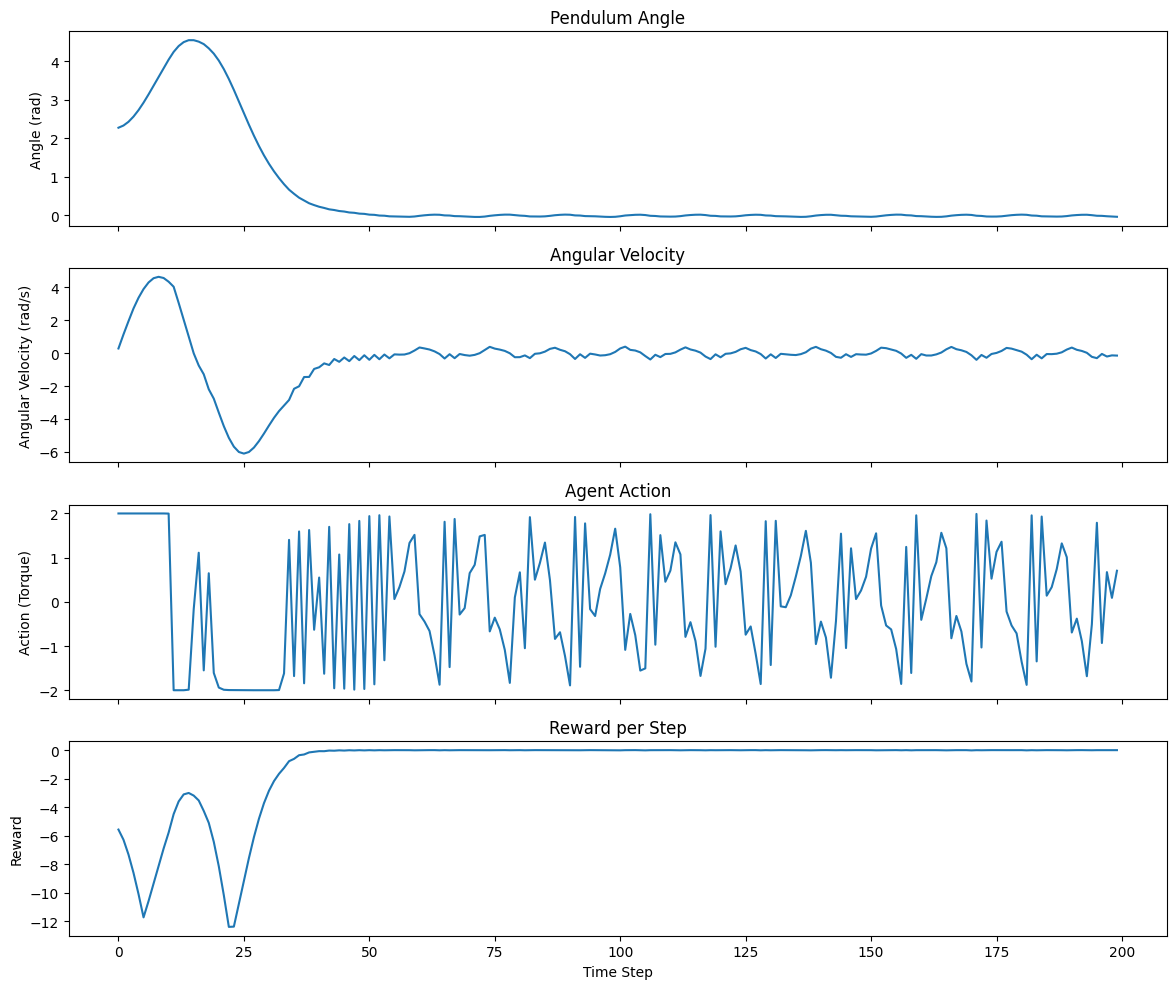

In [58]:
# Convert collected data
states = np.array(states)
angles = states[:, 0]
angular_velocities = states[:, 1]
rewards = np.array(rewards)
actions = np.array(actions)

# Plot trajectory
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axs[0].plot(angles)
axs[0].set_ylabel("Angle (rad)")
axs[0].set_title("Pendulum Angle")

axs[1].plot(angular_velocities)
axs[1].set_ylabel("Angular Velocity (rad/s)")
axs[1].set_title("Angular Velocity")

axs[2].plot(actions)
axs[2].set_ylabel("Action (Torque)")
axs[2].set_title("Agent Action")

axs[3].plot(rewards)
axs[3].set_ylabel("Reward")
axs[3].set_xlabel("Time Step")
axs[3].set_title("Reward per Step")

plt.tight_layout()
plt.show()


# Visualize Pendulum

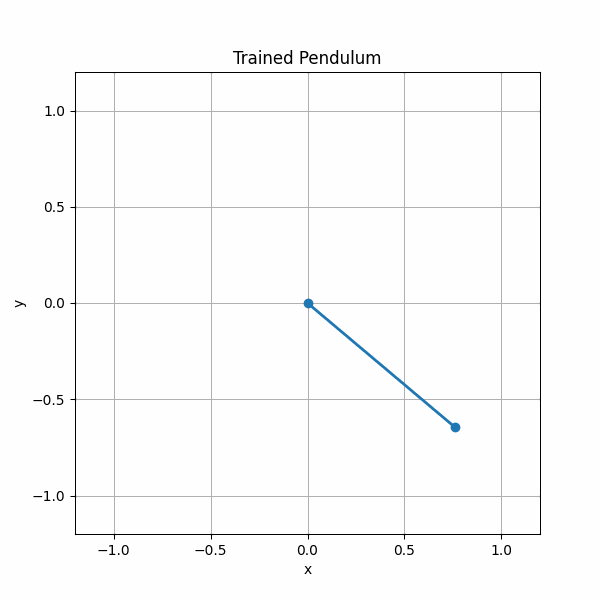

In [59]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image

# Compute pendulum tip positions
L = env.L
x = L * np.sin(angles)
y = L * np.cos(angles)

# Create figure and plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-L - 0.2, L + 0.2)
ax.set_ylim(-L - 0.2, L + 0.2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Trained Pendulum")
ax.grid(True)

line, = ax.plot([], [], 'o-', lw=2)

def init():
    line.set_data([], [])
    return line,

def update(i):
    line.set_data([0, x[i]], [0, y[i]])
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(x), init_func=init, interval=30, blit=True)

# Save to GIF
gif_path = "../figs/trained_pendulum.gif"
ani.save(gif_path, writer="pillow", fps=30)
plt.close()

# Display the GIF
Image(filename=gif_path)


# Visualize Pendulum and Cart

## Calculate Cart Positions

In [60]:
print(actions.shape)

(200,)


In [61]:
# Define initial conditions
initial_position = 0.0
initial_velocity = 0.0
delta_t = 0.05  # Time step, adjust as needed
mass = 1.0      # Mass of the cart (arbitrary)
L = 1.0         # Length of the pendulum (arbitrary)

# Initialize position and velocity lists
cart_positions = [initial_position]
velocity = initial_velocity

# Calculate cart positions based on torque
for torque in actions:
    # Compute the force from the torque (simplified as torque / L)
    force = torque / L
    # Update velocity and position (Newton's second law: F = m * a -> a = F / m)
    acceleration = force / mass
    velocity += acceleration * delta_t
    new_position = cart_positions[-1] + velocity * delta_t
    cart_positions.append(new_position)

# Convert to a numpy array for easy manipulation
cart_positions = np.array(cart_positions)

print("Cart positions calculated from torques:", cart_positions)


Cart positions calculated from torques: [ 0.          0.005       0.015       0.03        0.05        0.07499999
  0.10499999  0.13999998  0.17999996  0.22499994  0.27499991  0.32999264
  0.37998555  0.42497845  0.46497136  0.49999563  0.53460633  0.57199537
  0.60550809  0.6406389   0.67174817  0.69800835  0.71929537  0.73559228
  0.74689618  0.75320419  0.75451239  0.7508206   0.7421288   0.728437
  0.7097452   0.6860534   0.65736171  0.62368017  0.58594891  0.55172434
  0.51330031  0.47885799  0.43980831  0.40482123  0.36825618  0.33306598
  0.29380987  0.25879676  0.21889433  0.18166983  0.13953255  0.10179256
  0.05908738  0.02096077 -0.022095   -0.06030135 -0.10317333 -0.14114357
 -0.18241732 -0.21886118 -0.25514749 -0.29059901 -0.32433252 -0.35473668
 -0.38135078 -0.40866037 -0.43708508 -0.46715969 -0.50026399 -0.53805522
 -0.57131624 -0.60826777 -0.64053068 -0.67351118 -0.70684386 -0.7385513
 -0.76816483 -0.79407473 -0.81619703 -0.83999139 -0.86467981 -0.89092657
 -0.91989422 -